# **Data Exploration and Preprocessing**

# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import glob


In [ ]:
from google.colab import files #upload kaggle.json file
files.upload()


In [ ]:
import shutil
shutil.move('kaggle.json', '/content/kaggle.json')


In [ ]:
!pwd
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d parisrohan/credit-score-classification -f train.csv

In [ ]:
!kaggle datasets download -d parisrohan/credit-score-classification -f test.csv

In [ ]:
!unzip train.csv.zip

In [ ]:
!unzip test.csv.zip


# Reading and exploring train.csv file



In [ ]:
df_sample1=pd.read_csv("train.csv")

In [ ]:
df_sample1.head().T

In [ ]:
df_sample1.describe()

* checking for Null values

In [ ]:
df_sample1.info()

* Summing null values in each column

In [ ]:
df_sample1.isnull().sum()

# Combining Test and Train for Data Cleaning

In [ ]:
#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

In [ ]:
df = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
df.head()

# Peforming Data Cleaning

In [ ]:
#exploring all the unique values in the column to see the variation in error (if any) entries. Few values have entries starting with "-" or ending with "_". This needs to be cleaned
unique_values = df["Num_of_Delayed_Payment"].unique()
print("Unique values in column Num_of_Delayed_Payment:", unique_values)

In [ ]:
df["Monthly_Inhand_Salary"]

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str) #converting data to string, to be able to do string manipulation 
df['Monthly_Balance'] = df['Monthly_Balance'].str[:10] #Restricting the the number of characters in string because some of the the columns have enteries which exceed the limit of float datatype.
#Some of the data had "None", "Nan" and "_" in them so cleaning the data accordingly.
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: str(x).replace("_"," "))
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: str(x).replace("nan","0"))
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: str(x).replace("None","0"))
#converting the data to numeric since it will be used later on for analysis
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'])

In [ ]:
#Some of the data had "None", "Nan" and "_" in them so cleaning the data accordingly.
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: str(x).replace("_"," "))
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: str(x).replace("nan","0"))
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: str(x).replace("None","0"))
#converting the data to numeric since it will be used later on for analysis
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])

In [ ]:
new_df=df.copy()  #making copy of original dataframe

In [ ]:
new_df['Delay_from_due_date'] = new_df['Delay_from_due_date'].apply(lambda x: str(x).replace("-"," "))
new_df['Delay_from_due_date'] = new_df['Delay_from_due_date'].apply(lambda x: str(x).replace(" ","0")) 
new_df['Delay_from_due_date'] = pd.to_numeric(new_df['Delay_from_due_date']) 

In [ ]:
#To convert the values in the Credit_History_Age column to integers or floats, we need to find a suitable approach.
# We extract the first two characters from the left for Years and the two characters from the 7th position from the right end.
# We extract the relevant characters from the string.
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].replace('NaN', np.nan).fillna(0)   #Replace the null string values with 0 to facilitate their conversion to integer type in the future
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].astype(str)   #convert into string to perform string slicing.
#Make separate column for Month and Year                     
new_df['History_Year'] = new_df['Credit_History_Age'].str[ :2]  #To extract the initial two characters from the string.                                                            
new_df['History_Month'] = new_df['Credit_History_Age'].str[ -9:-7]   #Utilize negative indices to count the values from the right side of the data.

In [ ]:
#convert these column to numeric
new_df['History_Year'] = pd.to_numeric(new_df['History_Year'])                 
new_df['History_Month'] = pd.to_numeric(new_df['History_Month']) 

In [ ]:
#After obtaining the months and years separately, we can create a combined column that represents the total number of months in the Credit_History_Age field.
new_df['Credit_History_Age'] = new_df['History_Year']*12 + new_df['History_Month']  
#Since we have created a consolidated column for Credit_History_Age, we can now proceed to remove the History_Year and History_Month columns.
new_df = new_df.drop(['History_Year'], axis = 1)                                
new_df = new_df.drop(['History_Month'], axis = 1)
new_df['Credit_History_Age']=pd.to_numeric(new_df['Credit_History_Age'])


In [ ]:
#Some entries had data ending with "_" so replace with space and then convert data to numeric
new_df['Annual_Income'] = new_df['Annual_Income'].apply(lambda x: str(x).replace("_"," "))
new_df['Annual_Income'] = pd.to_numeric(new_df['Annual_Income'])

In [ ]:
unique_values = df["Outstanding_Debt"].unique()
print("Unique values in column Outstanding_Debt:", unique_values)

Unique values in column Outstanding_Debt: ['809.98' '605.03' '1303.01' ... '1350.85_' '1453.61_' '3571.7_']


In [ ]:
#Some entries had data ending with "_" so replace with space and then convert data to numeric
new_df['Outstanding_Debt'] = new_df['Outstanding_Debt'].apply(lambda x: str(x).replace("_"," ")) 
new_df['Outstanding_Debt'] = pd.to_numeric(new_df['Outstanding_Debt'])    

In [ ]:
new_df['Age'].max()

'997'

In [ ]:
#Some entries had data ending with "_" and were in negative "-", so replace with space and then convert data to numeric
new_df['Age'] = new_df['Age'].apply(lambda x: str(x).replace("_"," "))
new_df['Age'] =new_df['Age'].apply(lambda x: str(x).replace("-"," "))
#Few Age entries might exceed 3 characters limit, assuming it to be typing error, we restrict age accordingly
new_df['Age'] = new_df['Age'].str[ :3]   
new_df['Age'] = pd.to_numeric(new_df['Age']) 

In [ ]:
#Some entries had data ending with "_" and were in negative "-", so replace with space and then convert data to numeric
new_df['Num_of_Loan'] = new_df['Num_of_Loan'].apply(lambda x: str(x).replace("_"," "))
new_df['Num_of_Loan'] = new_df['Num_of_Loan'].apply(lambda x: str(x).replace("-","0"))
new_df['Num_of_Loan'] = new_df['Num_of_Loan'].str[ :1] 
new_df['Num_of_Loan'] = pd.to_numeric(new_df['Num_of_Loan'])

In [ ]:
#Some entries had data ending with "_" so replace with space and then convert data to numeric
new_df['Outstanding_Debt'] = new_df['Outstanding_Debt'].apply(lambda x: str(x).replace("_"," ")) 
new_df['Outstanding_Debt'] = pd.to_numeric(new_df['Outstanding_Debt'])  

In [ ]:
#Some entries had data ending with "_" and were in negative "-", so replace with space
#Some entries had "None" and "NaN" so replace with "0" and then convert data to numeric
new_df['Num_of_Delayed_Payment'] = new_df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("None","0")) 

new_df['Num_of_Delayed_Payment'] = new_df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("_"," "))    
new_df['Num_of_Delayed_Payment'] = new_df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("-"," "))
new_df['Num_of_Delayed_Payment'] = new_df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("nan","0")) 

new_df['Num_of_Delayed_Payment'] = pd.to_numeric(new_df['Num_of_Delayed_Payment'])

In [ ]:
#Due to significant missing values, drop the column. Annual Income can still be used for analysis.
new_df = new_df.drop(['Monthly_Inhand_Salary'], axis = 1) 

* Exploring dataframe after cleaning and performing further processing if required

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int64  
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  int64  
 9   Num_Credit_Card           150000 non-null  int64  
 10  Interest_Rate             150000 non-null  int64  
 11  Num_of_Loan               150000 non-null  int64  
 12  Type_of_Loan              132888 non-null  object 
 13  Delay_from_due_date       150000 non-null  i

In [ ]:
#Exploring the unique values of Age column.
unique_values = new_df["Age"].unique()
print("Unique values in column Age:", unique_values)

Unique values in column Age: [ 23  24  28  35  55  22  31  32 169  34  30 914  45  41  33  36  39  40
  37  21  46  26  27  42  20  48  49  38  44  50  16  17  19 319  43 339
  14  15  25 120 282  18  47 164 832  29  53  56 658 701  54 376 447 402
 457  51  52 335 803 461 786 252 326 488 694 828 840 451 316 517 821 494
 312 295 767 550 413 208 375 297 772 480 542 478 439 321 600 538 731 553
 683 206 833 253 158 774 525 704 195 533 207 184 432 191 844 723 506 269
 328 750 455 509 697 849 371 693 392 609 352 783 516 784 327 631 393 219
 722 505 726 620 942 200 398 667 476 495 572 696 348 502 180 747 676 573
 700 163 420 835 258 492 119 248 430 290 679 548 554 800 864 643 848 655
 686 204 665 171 746 541 238 487 223 474 520 624  95 536 576 510 387 562
 210 240 225 360 275 601 156 296 501 399 674 438 373 629 170 842 560 734
 797 452 708 692 444 654 468 647 843 640 116 743 273 357 320 796 426 141
 684 705 133 619 485 830 251 790 134 345 561 303 608 756 742 384 287 165
 664 738 104 179 379 2

In [ ]:
#Restricting dataset to Age values which are legal to open an account i.e 18 till 100 which is appropriate in context.
new_df = new_df[(new_df["Age"]> 18) & (new_df["Age"]< 100)]

In [ ]:
unique_values = new_df["Age"].unique()
print("Unique values in column Age:", unique_values)

Unique values in column Age: [23 24 28 35 55 22 31 32 34 30 45 41 33 36 39 40 37 21 46 26 27 42 20 48
 49 38 44 50 19 43 25 47 29 53 56 54 51 52 95 99]


In [ ]:
unique_values = new_df["Delay_from_due_date"].unique()
print("Unique values in column Age:", unique_values)

Unique values in column Age: [ 3  1  4  8  6  5  9  0 30 29 11  2 16 10 24 23 12 18 17 51 34 32 45 48
 25 49 43 50 22 55 52 61 59 60 31 27 15 14 13  7 53 44 54 20 28 62 57 56
 41 37 19 64 42 21 26 33 46 36 38 35 40 47 39 66 58 63 65 67]


# Encoding The Catagorical And Ordinal Data

# One-Hot Encoding 

The Payment_of_Min_Amount column can be treated as categorical variables, and we can use a OneHotEncoder to create dummy variables for further analysis

In [ ]:

new_df = new_df[new_df.Payment_of_Min_Amount != 'NM']  
new_df = new_df.copy()
dummies = pd.get_dummies(df["Payment_of_Min_Amount"], prefix="PMA")
new_df = pd.concat([new_df, dummies], axis=1)
new_df = new_df.drop("Payment_of_Min_Amount", axis=1)


In [ ]:
new_df = new_df[new_df.Payment_Behaviour != '!@9#%8']

# Ordinal Encoding

Credit_Mix, Payment_Behaviour and Credit_score are ordinal.So we use OrdinalEncoder of sklearn library to encode them.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
new_df = new_df.dropna(subset=["Credit_Mix"])
encoder1 = OrdinalEncoder(categories=[ [ '_',
                    'Bad',
                    'Standard',
                    'Good']])
encoded1 = encoder1.fit_transform(new_df[["Credit_Mix"]])
new_df["Credit_Mix"] = encoded1.astype(int)

<ipython-input-40-764c64ec6813>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Credit_Mix"] = encoded1.astype(int)


In [ ]:
new_df = new_df.dropna(subset=["Credit_Score"])
encoder2 = OrdinalEncoder(categories=[ ['Poor',
                      'Standard',
                      'Good' ]])
encoded2 = encoder2.fit_transform(new_df[["Credit_Score"]])
new_df["Credit_Score"] = encoded2.astype(int)

<ipython-input-41-d9ad57bc3037>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Credit_Score"] = encoded2.astype(int)


In [ ]:
new_df = new_df.dropna(subset=["Payment_Behaviour"])
encoder3 = OrdinalEncoder(categories=[ ['Low_spent_Small_value_payments',
                          'Low_spent_Medium_value_payments',
                          'High_spent_Small_value_payments',
                          'Low_spent_Large_value_payments',
                           'High_spent_Medium_value_payments',
                           'High_spent_Large_value_payments']])
encoded3 = encoder3.fit_transform(new_df[["Payment_Behaviour"]])
new_df["Payment_Behaviour"] = encoded3.astype(int)

In [ ]:
new_df= new_df.fillna('0')

In [ ]:
new_df['Credit_History_Age']=pd.to_numeric(new_df['Credit_History_Age'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73176 entries, 50000 to 149998
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        73176 non-null  object 
 1   Customer_ID               73176 non-null  object 
 2   Month                     73176 non-null  object 
 3   Name                      73176 non-null  object 
 4   Age                       73176 non-null  float64
 5   SSN                       73176 non-null  object 
 6   Occupation                73176 non-null  object 
 7   Annual_Income             73176 non-null  float64
 8   Num_Bank_Accounts         73176 non-null  float64
 9   Num_Credit_Card           73176 non-null  float64
 10  Interest_Rate             73176 non-null  float64
 11  Num_of_Loan               73176 non-null  float64
 12  Type_of_Loan              73176 non-null  object 
 13  Delay_from_due_date       73176 non-null  float64
 14  N

In [ ]:
new_df.head().T

,50000,50001,50002,50003,50004
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.0,23.0,50.0,23.0,23.0
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0


Checking the correlation using Correlation Matrix

In [ ]:
corr_matrix = new_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

<ipython-input-47-73453ae6c474>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_df.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,PMA_NM,PMA_No,PMA_Yes
Age,1.000000,0.005703,-0.002895,-0.004271,-0.001688,-0.153782,-0.130716,0.001444,0.102162,-0.160922,0.014455,0.145509,0.000708,0.000431,0.024374,-0.003152,0.124528,nan,0.201969,-0.201969
Annual_Income,0.005703,1.000000,-0.003353,0.000662,-0.004921,-0.008926,-0.012152,0.003179,0.004758,-0.006800,0.011050,-0.001821,-0.000941,-0.006052,0.013298,0.000886,0.006205,nan,0.008441,-0.008441
Num_Bank_Accounts,-0.002895,-0.003353,1.000000,0.000535,-0.003394,0.009788,0.016946,-0.002935,-0.009362,0.015338,0.000373,-0.008546,0.000754,0.002359,-0.000043,0.001013,-0.010529,nan,-0.010981,0.010981
Num_Credit_Card,-0.004271,0.000662,0.000535,1.000000,-0.004927,0.006263,0.009242,0.004825,-0.004611,0.004193,-0.003997,-0.001451,0.004242,-0.001672,-0.004917,0.001218,-0.005878,nan,-0.008729,0.008729
Interest_Rate,-0.001688,-0.004921,-0.003394,-0.004927,1.000000,0.009408,0.010897,0.003361,-0.000664,0.011173,-0.002939,-0.007207,0.001386,0.000777,0.000043,0.001118,0.000020,nan,-0.008924,0.008924
Num_of_Loan,-0.153782,-0.008926,0.009788,0.006263,0.009408,1.000000,0.472470,0.009253,-0.321612,0.598269,-0.095716,-0.444339,-0.000629,-0.016504,-0.083627,0.001791,-0.334342,nan,-0.483164,0.483164
Delay_from_due_date,-0.130716,-0.012152,0.016946,0.009242,0.010897,0.472470,1.000000,0.012591,-0.375435,0.572487,-0.064537,-0.388037,-0.004582,-0.015188,-0.083582,0.000959,-0.430496,nan,-0.512505,0.512505
Num_of_Delayed_Payment,0.001444,0.003179,-0.002935,0.004825,0.003361,0.009253,0.012591,1.000000,-0.011209,0.010075,0.001878,-0.005804,0.001593,0.001181,0.005941,0.000883,-0.009904,nan,-0.013923,0.013923
Credit_Mix,0.102162,0.004758,-0.009362,-0.004611,-0.000664,-0.321612,-0.375435,-0.011209,1.000000,-0.373769,0.047426,0.271413,0.001764,0.010782,0.064722,0.001534,0.268634,nan,0.423467,-0.423467
Outstanding_Debt,-0.160922,-0.006800,0.015338,0.004193,0.011173,0.598269,0.572487,0.010075,-0.373769,1.000000,-0.069403,-0.491194,-0.005488,-0.012756,-0.097910,-0.000207,-0.381571,nan,-0.494254,0.494254


Making a copy of cleaned dataframe to be used further

In [ ]:
cleaned_data=new_df.copy()

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73176 entries, 50000 to 149998
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        73176 non-null  object 
 1   Customer_ID               73176 non-null  object 
 2   Month                     73176 non-null  object 
 3   Name                      73176 non-null  object 
 4   Age                       73176 non-null  float64
 5   SSN                       73176 non-null  object 
 6   Occupation                73176 non-null  object 
 7   Annual_Income             73176 non-null  float64
 8   Num_Bank_Accounts         73176 non-null  float64
 9   Num_Credit_Card           73176 non-null  float64
 10  Interest_Rate             73176 non-null  float64
 11  Num_of_Loan               73176 non-null  float64
 12  Type_of_Loan              73176 non-null  object 
 13  Delay_from_due_date       73176 non-null  float64
 14  N

# Feature Engineering

## Target Transformation

Checking the Gaussian Distribution of Target variable Credit Score 

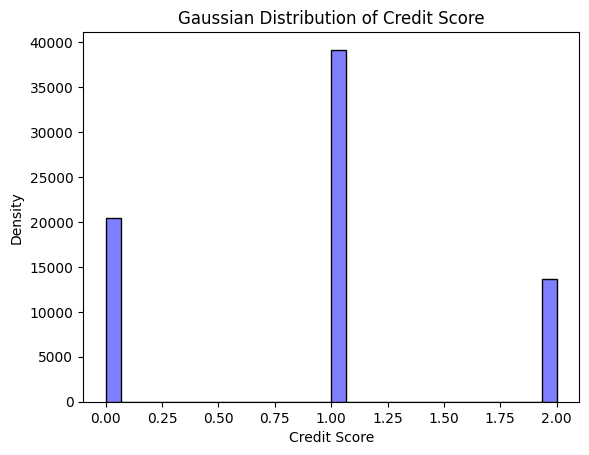

In [ ]:
# Extract the 'Credit Score' feature
credit_score = cleaned_data['Credit_Score']

# Plot the Gaussian distribution using seaborn
sns.histplot(credit_score, bins=30, alpha=0.5, color='blue')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Gaussian Distribution of Credit Score')
plt.show()

### Checking the skewness of Distribution

In [ ]:
import scipy.stats as stats
import numpy as np

cleaned_data["Credit_Score"].value_counts()

# Define the data
data = np.array([1]*35635 + [0]*15761 + [2]*13127)

# Calculate the skewness of the data
skewness = stats.skew(data)

# Print the skewness
print("Skewness of the data: {:.2f}".format(skewness))


Skewness of the data: 0.05


### Checking all the columns present in data

In [ ]:
cleaned_data.columns.values  

array(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'PMA_NM', 'PMA_No', 'PMA_Yes'], dtype=object)

## Feature Extraction based on domain knowledge

Removed the columns ID, Customer_ID, Month and Name because they donot have any relation with credit score.

In [ ]:
cols = ['Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'PMA_NM', 'PMA_No', 'PMA_Yes']
cleaned_data = cleaned_data[cols]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73176 entries, 50000 to 149998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       73176 non-null  float64
 1   Annual_Income             73176 non-null  float64
 2   Num_Bank_Accounts         73176 non-null  float64
 3   Num_Credit_Card           73176 non-null  float64
 4   Interest_Rate             73176 non-null  float64
 5   Num_of_Loan               73176 non-null  float64
 6   Type_of_Loan              73176 non-null  object 
 7   Delay_from_due_date       73176 non-null  float64
 8   Num_of_Delayed_Payment    73176 non-null  float64
 9   Changed_Credit_Limit      73176 non-null  object 
 10  Num_Credit_Inquiries      73176 non-null  object 
 11  Credit_Mix                73176 non-null  int64  
 12  Outstanding_Debt          73176 non-null  float64
 13  Credit_Utilization_Ratio  73176 non-null  float64
 14  C

## Removing features based on their correlation with credit score(target variable)

### **Plotting the bar chart of each feature in correlation with target variable**

<ipython-input-54-4632dc297712>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleaned_data.corr()['Credit_Score'].drop(['Credit_Score'])


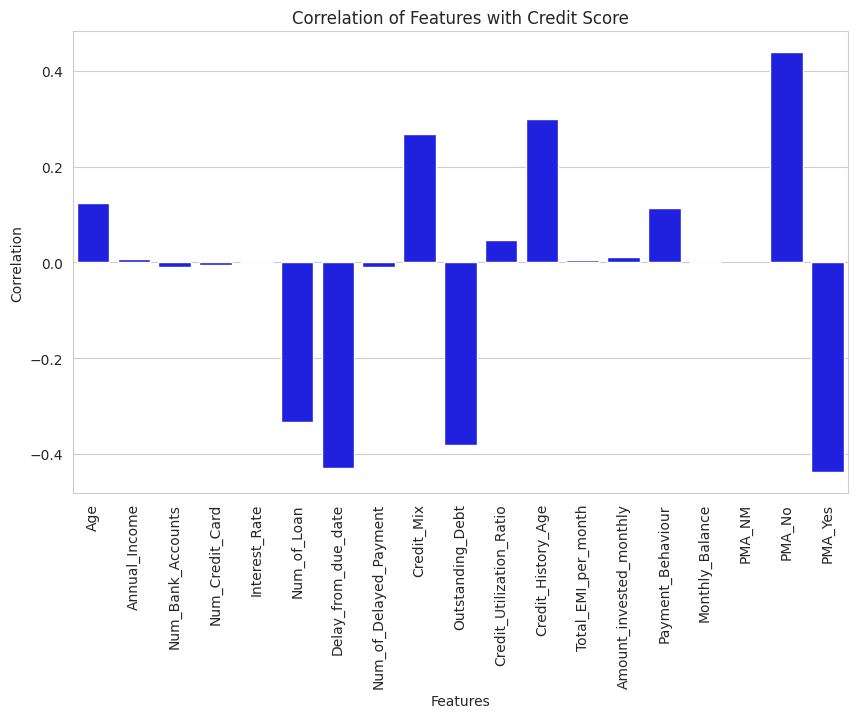

In [ ]:
corr = cleaned_data.corr()['Credit_Score'].drop(['Credit_Score'])

# Set style
sns.set_style('whitegrid')

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=corr.index, y=corr.values, ax=ax, color='b')
ax.set_title('Correlation of Features with Credit Score')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show plot
plt.show()


## Explanation of Plot

*   Features Annual_Income, Num_Bank_Accounts, Num_Credit_Card, Total_EMI_per_month, Amount_invested_monthly, Monthly Balance have very low correlation with the target variable
*   The features 'Type_of_Loan, 'Changed_Credit_Limit' and 'Num_Credit_Inquiries' did not appear in the plot. There can be two main reasons for this

1.   The features had many missing values in them
2.   The features had two correlation with target variable. 

We will explore further to find the actual cause.







In [ ]:
missing_values_count = cleaned_data['Type_of_Loan'].isnull().sum()
print("Missing values of Type_of_Loan",missing_values_count)
missing_values_count = cleaned_data['Changed_Credit_Limit'].isnull().sum()
print("Missing values of Changed_Credit_Limit",missing_values_count)
missing_values_count = cleaned_data['Num_Credit_Inquiries'].isnull().sum()
print("Missing values of Num_Credit_Inquiries",missing_values_count)



Missing values of Type_of_Loan 0
Missing values of Changed_Credit_Limit 0
Missing values of Num_Credit_Inquiries 0


As indicated by above analysis these features have no missing values after data pre-processing. Hence it suggests that they have too low correlation with target variable to appear in plot.

## Conclusion

### **We will remove the features that did not appear in correlation plot from the dataset.**

In [ ]:
cols = ['Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment','Credit_History_Age','Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'PMA_NM', 'PMA_No', 'PMA_Yes']
cleaned_data = cleaned_data[cols]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73176 entries, 50000 to 149998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       73176 non-null  float64
 1   Annual_Income             73176 non-null  float64
 2   Num_Bank_Accounts         73176 non-null  float64
 3   Num_Credit_Card           73176 non-null  float64
 4   Interest_Rate             73176 non-null  float64
 5   Num_of_Loan               73176 non-null  float64
 6   Delay_from_due_date       73176 non-null  float64
 7   Num_of_Delayed_Payment    73176 non-null  float64
 8   Credit_History_Age        73176 non-null  float64
 9   Credit_Mix                73176 non-null  int64  
 10  Outstanding_Debt          73176 non-null  float64
 11  Credit_Utilization_Ratio  73176 non-null  float64
 12  Total_EMI_per_month       73176 non-null  float64
 13  Amount_invested_monthly   73176 non-null  float64
 14  P

## Dealing with outliers in data

### **Detecting Outliers using Scatter Plots**

Reletive Plot Of Features


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seabo

<Figure size 2000x2000 with 0 Axes>

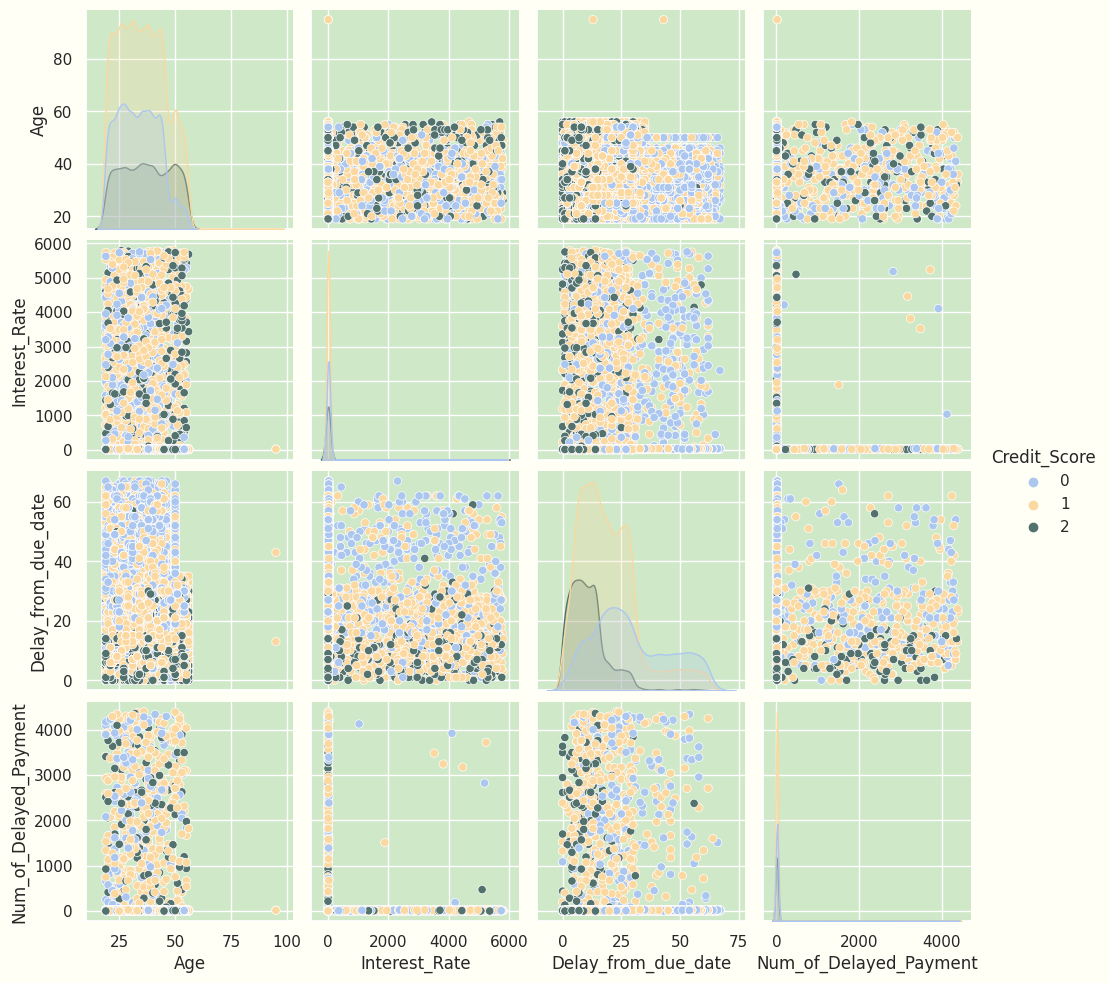

In [ ]:

sns.set(rc={"axes.facecolor":"#CEE8C8","figure.facecolor":"#FFFFF5"})
pallet = ["#FAD89F", "#53726D", "#424141", "#FFFFF5"]
cmap = colors.ListedColormap(["#ACC7EF", "#FAD89F", "#53726D", "#424141", "#FFFFF5"])
#Plotting following features
To_Plot = [ "Age", "Interest_Rate", "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Score"]
print("Reletive Plot Of Features")
plt.figure(figsize=(20,20))  
sns.pairplot(cleaned_data[To_Plot], hue= "Credit_Score", palette= (["#ACC7EF", "#FAD89F", "#53726D", "#424141"]))
#Taking hue 
plt.show()

### Explanatory Analysis of Scatter Plot


1. Interest_rate column has outliers which we will delete due to lack of information.
2. Num_of_Delayed_Payment also has some outliers. We will remove the outliers by using quantile.




### **Dealing with outliers**

Removing outliers by applying quantile range to features with outliers

In [ ]:
# We can clearly see that interest rate and num of delayed payment has few outliiers so we will use quantile to remove outliers 

q = cleaned_data['Interest_Rate'].quantile(0.95)
cleaned_data = cleaned_data[cleaned_data['Interest_Rate']<q]

q = cleaned_data['Num_of_Delayed_Payment'].quantile(0.95)
cleaned_data = cleaned_data[cleaned_data['Num_of_Delayed_Payment']<q]


cleaned_data.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_History_Age,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,PMA_NM,PMA_No,PMA_Yes
count,64523.000000,6.452300e+04,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,6.452300e+04,64523.000000,64523.0,64523.000000,64523.000000
mean,35.326860,1.818940e+05,16.963207,22.087984,12.774995,3.028377,18.890566,11.290238,215.201665,1.752367,1230.955283,32.400487,1399.369993,623.316297,2.279280,1.050576e+02,0.959177,0.0,0.477148,0.522852
std,10.088472,1.442609e+06,118.987946,127.874178,7.635509,2.329732,13.543497,6.402964,113.957124,1.078470,1033.089785,5.139010,8269.971865,2015.564061,1.849048,3.214733e+04,0.667875,0.0,0.499481,0.499481
min,19.000000,7.006035e+03,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,-3.333333e+06,0.000000,0.0,0.000000,0.000000
25%,27.000000,2.035543e+04,3.000000,4.000000,7.000000,1.000000,9.000000,7.000000,137.000000,1.000000,495.740000,28.152948,26.947512,69.783963,0.000000,2.755742e+02,1.000000,0.0,0.000000,0.000000
50%,35.000000,3.909434e+04,5.000000,5.000000,11.000000,3.000000,16.000000,12.000000,223.000000,2.000000,1016.370000,32.420808,65.089732,133.297123,2.000000,3.483578e+02,1.000000,0.0,0.000000,1.000000
75%,43.000000,7.813942e+04,7.000000,7.000000,18.000000,4.000000,26.000000,17.000000,308.000000,3.000000,1472.320000,36.623414,152.439137,268.283225,4.000000,4.949873e+02,1.000000,0.0,1.000000,1.000000
max,95.000000,2.419806e+07,1798.000000,1498.000000,31.000000,9.000000,67.000000,22.000000,404.000000,3.000000,4998.070000,50.000000,82256.000000,10000.000000,5.000000,1.602041e+03,2.000000,0.0,1.000000,1.000000


### Plotting the scatter plot after removing outliers

Reletive Plot Of Features


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seabo

<Figure size 2000x2000 with 0 Axes>

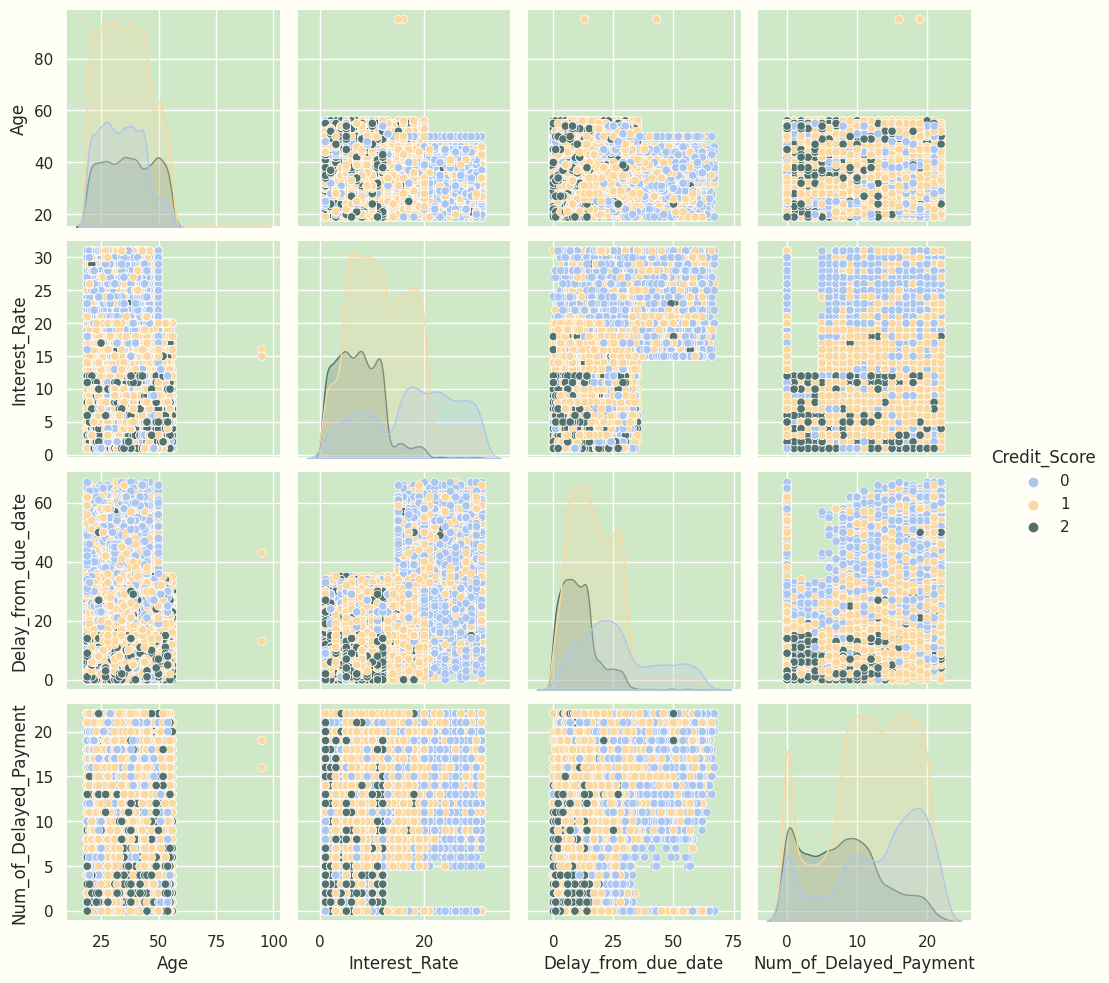

In [ ]:
sns.set(rc={"axes.facecolor":"#CEE8C8","figure.facecolor":"#FFFFF5"})
pallet = ["#FAD89F", "#53726D", "#424141", "#FFFFF5"]
cmap = colors.ListedColormap(["#ACC7EF", "#FAD89F", "#53726D", "#424141", "#FFFFF5"])
#Plotting following features
To_Plot = [ "Age", "Interest_Rate", "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Score"]
print("Reletive Plot Of Features")
plt.figure(figsize=(20,20))  
sns.pairplot(cleaned_data[To_Plot], hue= "Credit_Score", palette= (["#ACC7EF", "#FAD89F", "#53726D", "#424141"]))
#Taking hue 
plt.show()

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64523 entries, 50000 to 149998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       64523 non-null  float64
 1   Annual_Income             64523 non-null  float64
 2   Num_Bank_Accounts         64523 non-null  float64
 3   Num_Credit_Card           64523 non-null  float64
 4   Interest_Rate             64523 non-null  float64
 5   Num_of_Loan               64523 non-null  float64
 6   Delay_from_due_date       64523 non-null  float64
 7   Num_of_Delayed_Payment    64523 non-null  float64
 8   Credit_History_Age        64523 non-null  float64
 9   Credit_Mix                64523 non-null  int64  
 10  Outstanding_Debt          64523 non-null  float64
 11  Credit_Utilization_Ratio  64523 non-null  float64
 12  Total_EMI_per_month       64523 non-null  float64
 13  Amount_invested_monthly   64523 non-null  float64
 14  P

In [ ]:
Y = cleaned_data['Credit_Score'].copy()
X = cleaned_data.drop(('Credit_Score'), axis=1).copy()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X.describe(include = 'all')

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_History_Age,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,PMA_NM,PMA_No,PMA_Yes
count,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,64523.0,6.452300e+04,6.452300e+04
mean,-3.488678e-16,-1.178310e-17,1.145273e-17,4.404896e-19,1.074795e-16,6.431148e-17,9.426477e-17,-1.167297e-16,6.343050e-17,-8.809792e-18,-8.809792e-19,8.693062e-16,-2.929256e-17,7.906788e-17,-6.871638e-17,-8.809792e-19,0.0,-7.003784e-17,-4.889434e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,1.000008e+00,1.000008e+00
min,-1.618381e+00,-1.212312e-01,-1.509678e-01,-1.727335e-01,-1.542148e+00,-1.299892e+00,-1.394818e+00,-1.763297e+00,-1.888459e+00,-1.624877e+00,-1.191314e+00,-2.413030e+00,-1.692123e-01,-3.092539e-01,-1.232687e+00,-1.036933e+02,0.0,-9.552937e-01,-1.046799e+00
25%,-8.253901e-01,-1.119775e-01,-1.173507e-01,-1.414525e-01,-7.563398e-01,-8.706550e-01,-7.302872e-01,-6.700445e-01,-6.862429e-01,-6.976304e-01,-7.116719e-01,-8.265351e-01,-1.659538e-01,-2.746311e-01,-1.232687e+00,5.304265e-03,0.0,-9.552937e-01,-1.046799e+00
50%,-3.239963e-02,-9.898783e-02,-1.005421e-01,-1.336323e-01,-2.324676e-01,-1.218067e-02,-2.134300e-01,1.108499e-01,6.843272e-02,2.296166e-01,-2.077137e-01,3.954271e-03,-1.613416e-01,-2.431195e-01,-1.510412e-01,7.568345e-03,0.0,-9.552937e-01,9.552937e-01
75%,7.605908e-01,-7.192202e-02,-8.373356e-02,-1.179918e-01,6.843087e-01,4.170565e-01,5.249375e-01,8.917443e-01,8.143331e-01,1.156864e+00,2.336356e-01,8.217458e-01,-1.507793e-01,-1.761471e-01,9.306048e-01,1.212955e-02,0.0,1.046799e+00,9.552937e-01
max,5.915029e+00,1.664786e+01,1.496833e+01,1.154200e+01,2.386893e+00,2.563242e+00,3.552244e+00,1.672639e+00,1.656762e+00,1.156864e+00,3.646483e+00,3.424716e+00,9.777211e+00,4.652175e+00,1.471428e+00,4.656668e-02,0.0,1.046799e+00,9.552937e-01


# Splitting Train and Test Data

In [ ]:
X_train_all, X_test, Y_train_all, Y_test = train_test_split(X, Y, train_size=0.75, random_state=123)

# **Model Selection:**
The dataset of the credit card score classification is a large dataset with almost twenty-eight features. Moreover, the target variable that is credit score is categorical. Therefore, the algorithms of multi-class classification will be used to train the machine learning models. 
The following machine learning algorithms have been chosen for this dataset:


*   Multi-Layer Perceptron
*   Support Vector Machine
*   Decision Tree 
*   Random Forest
*   Logistic Regression
*   KNeighbours

The above machine learning algorithms would be evaluated in terms of accuracy, precision, recall and F1 score to choose the best algorithm for our dataset.










### Splitting the dataset

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_all, Y_train_all, train_size=0.7, random_state=123)

###Establishing Criteria for model selection

In [ ]:
col = ['Algorithm', 
       'Score','Accuracy', 'Precision', 
       'Recall', 'F1']
model_results = pd.DataFrame(columns=col)
i=0

###Training Multi-Layer Perceptron Classifier

In [ ]:
mlpc_clf = MLPClassifier(hidden_layer_sizes=(30,),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlpc_clf.fit(X_train, Y_train)
y_pred = mlpc_clf.predict(X_val)
model_results.loc[i]=['Multi-Layer Perceptron',
                         round(mlpc_clf.score(X_val, Y_val)*100,3),
                         round(accuracy_score(Y_val, y_pred)*100,3),
                         round(precision_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(recall_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(f1_score(Y_val, y_pred, average='macro')*100,3)
                         ]
i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


###Training K-Neighbours Classifier

In [ ]:
KNeighborsModel =  KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
KNeighborsModel.fit(X_train, Y_train)
y_pred = KNeighborsModel.predict(X_val)
model_results.loc[i]=['KNeighbours',
                         round(KNeighborsModel.score(X_val, Y_val)*100,3),
                         round(accuracy_score(Y_val, y_pred)*100,3),
                         round(precision_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(recall_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(f1_score(Y_val, y_pred, average='macro')*100,3)
                         ]
i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


###Training Support Vector Machine Classifier

In [ ]:
svc_clf=SVC()
svc_clf.fit(X_train, Y_train)
y_pred = svc_clf.predict(X_val)
model_results.loc[i]= ['Support Vector Machine',
                         round(svc_clf.score(X_val, Y_val)*100,3),
                         round(accuracy_score(Y_val, y_pred)*100,3),
                         round(precision_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(recall_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(f1_score(Y_val, y_pred, average='macro')*100,3)
                         ]
i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


###Training Decision Tree Classifier



In [ ]:
dt_clf=DecisionTreeClassifier(criterion = 'entropy')
dt_clf.fit(X_train, Y_train)
y_pred = dt_clf.predict(X_val)
model_results.loc[i] = ['Decision Tree',
                         round(dt_clf.score(X_val, Y_val)*100,3),
                         round(accuracy_score(Y_val, y_pred)*100,3),
                         round(precision_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(recall_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(f1_score(Y_val, y_pred, average='macro')*100,3)
                         ]
i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


###Training Random Forest Classifier

In [ ]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
y_pred = rf_clf.predict(X_val)
model_results.loc[i]=['Random Forest',
                         round(rf_clf.score(X_val, Y_val) * 100,3),
                         round(accuracy_score(Y_val, y_pred)*100,3),
                         round(precision_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(recall_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(f1_score(Y_val, y_pred, average='macro')*100,3)
                         ]
i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


###Training Logistic Regression Classifier

In [ ]:
lr_clf = LogisticRegression(solver='newton-cg', random_state = 0,class_weight='balanced')
lr_clf.fit(X_train, Y_train)
y_pred = lr_clf.predict(X_val)
model_results.loc[i]=['Logistic Regression',
                         round(lr_clf.score(X_val, Y_val) * 100,3),
                         round(accuracy_score(Y_val, y_pred)*100,3),
                         round(precision_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(recall_score(Y_val, y_pred,pos_label='positive',average='macro')*100,3),
                         round(f1_score(Y_val, y_pred, average='macro')*100,3)
                         ]
i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### **Evaluating the results**

In [ ]:
model_results.sort_values(by=['Score'], ascending=False)

,Algorithm,Score,Accuracy,Precision,Recall,F1
4,Random Forest,75.327,75.327,73.697,72.544,73.062
0,Multi-Layer Perceptron,68.233,68.233,65.453,64.575,64.893
2,Support Vector Machine,66.400,66.400,64.199,66.327,64.250
3,Decision Tree,66.159,66.159,63.155,63.680,63.406
1,KNeighbours,65.408,65.408,62.508,61.447,61.714
5,Logistic Regression,57.687,57.687,59.645,64.450,57.660


# Conclusion

Based on the results of evaluating models, the machine learning algorithm that fits best on the data set is Random Forest.

# Train and Test Score

In [ ]:
y_train_predict = rf_clf.predict(X_train)
y_predict = rf_clf.predict(X_val)
print('Test Score: ',round(accuracy_score(Y_val, y_predict)*100,3))
print('Train Score: ',round(accuracy_score(Y_train, y_train_predict)*100,3))

Test Score:  75.445
Train Score:  100.0


# Comparison with Ensemble Models

We will compare the performance of Random Forest and XGboost to select the best machine learning algorithm

In [ ]:
rf=RandomForestClassifier(max_depth=38, max_features=0.5149272365478609, n_estimators=600,criterion='gini',min_samples_split=5,
                          class_weight='balanced', random_state=42,max_leaf_nodes=8000)
rf.fit(X_train, Y_train)
y_train_predict = rf.predict(X_train)
y_pred = rf.predict(X_val)

In [ ]:
print('Test Score: ',round(accuracy_score(Y_val, y_pred)*100,3))
print('Train Score: ',round(accuracy_score(Y_train, y_train_predict)*100,3))

Test Score:  75.791
Train Score:  99.62


In [ ]:
model = XGBClassifier(learning_rate =0.15,
 n_estimators=100,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 num_class=3,
 nthread=4,
 seed=27)
model.fit(X_train, Y_train)
y_pred = model.predict(X_val)
y_train_predict = model.predict(X_train)

In [ ]:
print('Test Score: ',round(accuracy_score(Y_val, y_pred)*100,3))
print('Train Score: ',round(accuracy_score(Y_train, y_train_predict)*100,3))

Test Score:  75.84
Train Score:  100.0


By comparing both the algorithms we found out that XGboost has a higher accuracy than RandomForest hence we will choose it as our algorithm

#  Hyper-Parameter Tuning

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

Defining the parameters to be tuned

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'learning_rate':0.1,
        'objective':'multi:softmax',
        'num_class':3,
        'seed': 27
    }

In [ ]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, Y_train), ( X_val, Y_val)]
    
    clf.fit(X_train, Y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_val)
    accuracy = accuracy_score(Y_val, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
accuracy_list = []

def objective_with_accuracy_list(space):
    result = objective(space)
    accuracy_list.append(-result['loss'])
    return result

Finding out the best hyper-parameters and the scores

In [ ]:
trials = Trials()

best_hyperparams = fmin(
    fn=objective_with_accuracy_list,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6127565780410524
  1%|          | 1/100 [00:03<06:19,  3.84s/trial, best loss: -0.6127565780410524]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6144785783165725
  2%|▏         | 2/100 [00:06<05:18,  3.25s/trial, best loss: -0.6144785783165725]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145474583275934
  3%|▎         | 3/100 [00:14<08:40,  5.36s/trial, best loss: -0.6145474583275934]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6143408182945309
  4%|▍         | 4/100 [00:20<08:58,  5.61s/trial, best loss: -0.6145474583275934]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6164760986361758
  5%|▌         | 5/100 [00:26<09:04,  5.73s/trial, best loss: -0.6164760986361758]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6163383386141342
  6%|▌         | 6/100 [00:31<08:22,  5.35s/trial, best loss: -0.6164760986361758]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6133764981402398
  7%|▋         | 7/100 [00:33<06:59,  4.52s/trial, best loss: -0.6164760986361758]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6148229783716765
  8%|▊         | 8/100 [00:39<07:26,  4.85s/trial, best loss: -0.6164760986361758]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6169582587133214
  9%|▉         | 9/100 [00:44<07:30,  4.95s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6148229783716765
 10%|█         | 10/100 [00:48<07:01,  4.68s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6141341782614685
 11%|█         | 11/100 [00:51<06:05,  4.11s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6141341782614685
 12%|█▏        | 12/100 [00:54<05:26,  3.71s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6131009780961565
 13%|█▎        | 13/100 [00:57<05:00,  3.45s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6166827386692382
 14%|█▍        | 14/100 [01:01<05:21,  3.74s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6140652982504478
 15%|█▌        | 15/100 [01:04<04:53,  3.45s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.613996418239427
 16%|█▌        | 16/100 [01:07<04:32,  3.25s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.616751618680259
 17%|█▋        | 17/100 [01:11<04:54,  3.54s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6161316985810718
 18%|█▊        | 18/100 [01:14<04:39,  3.41s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6135142581622813
 19%|█▉        | 19/100 [01:17<04:20,  3.21s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6147540983606558
 20%|██        | 20/100 [01:20<04:07,  3.09s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6157184185149469
 21%|██        | 21/100 [01:24<04:31,  3.43s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.616407218625155
 22%|██▏       | 22/100 [01:27<04:18,  3.32s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6168204986912798
 23%|██▎       | 23/100 [01:30<04:18,  3.36s/trial, best loss: -0.6169582587133214]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6170271387243422
 24%|██▍       | 24/100 [01:35<04:44,  3.74s/trial, best loss: -0.6170271387243422]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.615374018459843
 25%|██▌       | 25/100 [01:38<04:23,  3.51s/trial, best loss: -0.6170271387243422]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6172337787574046
 26%|██▌       | 26/100 [01:41<04:15,  3.45s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6156495385039261
 27%|██▋       | 27/100 [01:45<04:28,  3.68s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6170271387243422
 28%|██▊       | 28/100 [01:49<04:21,  3.64s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6149607383937181
 29%|██▉       | 29/100 [01:52<04:02,  3.42s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145474583275934
 30%|███       | 30/100 [01:55<03:50,  3.29s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6169582587133214
 31%|███       | 31/100 [02:00<04:25,  3.84s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6157184185149469
 32%|███▏      | 32/100 [02:03<04:05,  3.60s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6157184185149469
 33%|███▎      | 33/100 [02:07<04:07,  3.70s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6146163383386142
 34%|███▍      | 34/100 [02:12<04:23,  4.00s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6172337787574046
 35%|███▌      | 35/100 [02:15<04:06,  3.79s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6152362584378014
 36%|███▌      | 36/100 [02:18<03:47,  3.56s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6156495385039261
 37%|███▋      | 37/100 [02:22<04:01,  3.83s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6152362584378014
 38%|███▊      | 38/100 [02:27<04:11,  4.06s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6169582587133214
 39%|███▉      | 39/100 [02:30<03:53,  3.82s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6146163383386142
 40%|████      | 40/100 [02:34<03:55,  3.93s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6161316985810718
 41%|████      | 41/100 [02:38<03:39,  3.72s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6169582587133214
 42%|████▏     | 42/100 [02:41<03:29,  3.61s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.615374018459843
 43%|████▎     | 43/100 [02:45<03:37,  3.82s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.615374018459843
 44%|████▍     | 44/100 [02:48<03:19,  3.56s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.616407218625155
 45%|████▌     | 45/100 [02:52<03:10,  3.46s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6171648987463838
 46%|████▌     | 46/100 [02:56<03:26,  3.82s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6144785783165725
 47%|████▋     | 47/100 [02:59<03:07,  3.53s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6135831381733021
 48%|████▊     | 48/100 [03:02<02:51,  3.31s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6157872985259678
 49%|████▉     | 49/100 [03:05<02:47,  3.29s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.615374018459843
 50%|█████     | 50/100 [03:09<02:56,  3.53s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6168893787023005
 51%|█████     | 51/100 [03:12<02:48,  3.44s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6151673784267806
 52%|█████▏    | 52/100 [03:16<02:40,  3.35s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6142030582724893
 53%|█████▎    | 53/100 [03:20<02:48,  3.58s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6166138586582174
 54%|█████▍    | 54/100 [03:23<02:38,  3.45s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6152362584378014
 55%|█████▌    | 55/100 [03:26<02:29,  3.32s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6171648987463838
 56%|█████▌    | 56/100 [03:30<02:42,  3.70s/trial, best loss: -0.6172337787574046]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6173026587684254
 57%|█████▋    | 57/100 [03:34<02:36,  3.63s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6166138586582174
 58%|█████▊    | 58/100 [03:37<02:30,  3.58s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6150984984157597
 59%|█████▉    | 59/100 [03:42<02:34,  3.77s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6139275382284061
 60%|██████    | 60/100 [03:44<02:19,  3.48s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6166827386692382
 61%|██████    | 61/100 [03:48<02:12,  3.39s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6168204986912798
 62%|██████▏   | 62/100 [03:52<02:23,  3.79s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6149607383937181
 63%|██████▎   | 63/100 [03:55<02:10,  3.53s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6154428984708638
 64%|██████▍   | 64/100 [03:58<02:01,  3.37s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6164760986361758
 65%|██████▌   | 65/100 [04:01<01:56,  3.32s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6173026587684254
 66%|██████▌   | 66/100 [04:06<02:07,  3.75s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6172337787574046
 67%|██████▋   | 67/100 [04:10<02:00,  3.64s/trial, best loss: -0.6173026587684254]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.617784818845571
 68%|██████▊   | 68/100 [04:13<01:53,  3.54s/trial, best loss: -0.617784818845571] 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6166138586582174
 69%|██████▉   | 69/100 [04:18<02:00,  3.89s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6163383386141342
 70%|███████   | 70/100 [04:21<01:48,  3.62s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6155806584929053
 71%|███████   | 71/100 [04:24<01:40,  3.47s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6157184185149469
 72%|███████▏  | 72/100 [04:28<01:44,  3.72s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6169582587133214
 73%|███████▎  | 73/100 [04:31<01:37,  3.61s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.616062818570051
 74%|███████▍  | 74/100 [04:34<01:29,  3.45s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.616062818570051
 75%|███████▌  | 75/100 [04:39<01:32,  3.68s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6168204986912798
 76%|███████▌  | 76/100 [04:42<01:26,  3.59s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6162694586031133
 77%|███████▋  | 77/100 [04:45<01:19,  3.47s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.613996418239427
 78%|███████▊  | 78/100 [04:48<01:13,  3.33s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6159939385590302
 79%|███████▉  | 79/100 [04:52<01:15,  3.60s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6172337787574046
 80%|████████  | 80/100 [04:56<01:09,  3.49s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6170271387243422
 81%|████████  | 81/100 [04:59<01:06,  3.50s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.617440418790467
 82%|████████▏ | 82/100 [05:04<01:09,  3.85s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6157872985259678
 83%|████████▎ | 83/100 [05:07<01:01,  3.62s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6158561785369886
 84%|████████▍ | 84/100 [05:10<00:55,  3.48s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6138586582173853
 85%|████████▌ | 85/100 [05:14<00:54,  3.64s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6166827386692382
 86%|████████▌ | 86/100 [05:17<00:49,  3.55s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6135831381733021
 87%|████████▋ | 87/100 [05:20<00:43,  3.34s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6170271387243422
 88%|████████▊ | 88/100 [05:25<00:45,  3.76s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6155117784818845
 89%|████████▉ | 89/100 [05:28<00:38,  3.53s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6173026587684254
 90%|█████████ | 90/100 [05:31<00:34,  3.50s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6133764981402398
 91%|█████████ | 91/100 [05:35<00:32,  3.65s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6156495385039261
 92%|█████████▏| 92/100 [05:39<00:27,  3.49s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6136520181843229
 93%|█████████▎| 93/100 [05:41<00:23,  3.30s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6149607383937181
 94%|█████████▍| 94/100 [05:44<00:19,  3.20s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.616062818570051
 95%|█████████▌| 95/100 [05:49<00:17,  3.58s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.617440418790467
 96%|█████████▌| 96/100 [05:52<00:13,  3.50s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6138586582173853
 97%|█████████▋| 97/100 [05:55<00:09,  3.30s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6159939385590302
 98%|█████████▊| 98/100 [05:59<00:07,  3.63s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6152362584378014
 99%|█████████▉| 99/100 [06:02<00:03,  3.41s/trial, best loss: -0.617784818845571]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6159250585480094
100%|██████████| 100/100 [06:05<00:00,  3.66s/trial, best loss: -0.617784818845571]


**Plotting the graph**

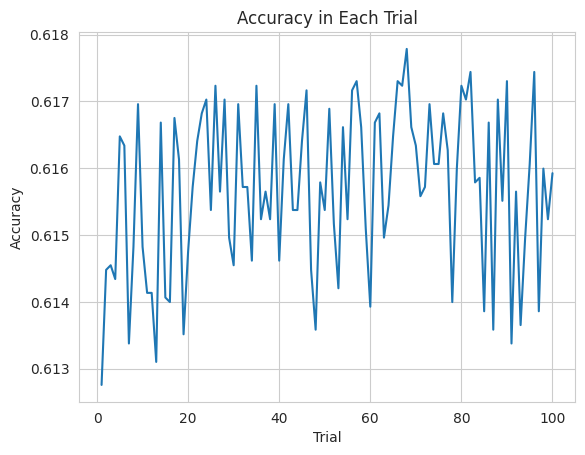

In [ ]:
# Plotting the accuracy graph
x = np.arange(1, len(accuracy_list) + 1)
y = accuracy_list

plt.plot(x, y)
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Accuracy in Each Trial')
plt.show()

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8324905286768634, 'gamma': 5.290239758248961, 'max_depth': 9.0, 'min_child_weight': 6.0, 'reg_alpha': 40.0, 'reg_lambda': 0.2268986376996688}


# Addressing Class Imbalance of data

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 2)
X_train_sm,Y_train_sm = smt.fit_resample(X_train,Y_train)


Evaluate on over-sampling 

In [ ]:
model = XGBClassifier(learning_rate =0.15,
 n_estimators=100,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 num_class=3,
 nthread=4,
 seed=27)
model.fit(X_train_sm, Y_train_sm)
y_pred = model.predict(X_val)
print('Test Score: ',round(accuracy_score(Y_val, y_pred)*100,3))

Test Score:  76.471


Evaluate on under-sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() # Numerical value
X_res, y_res = rus.fit_resample(X_train, Y_train)

In [ ]:
model = XGBClassifier(learning_rate =0.15,
 n_estimators=100,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 num_class=3,
 nthread=4,
 seed=27)
model.fit(X_res, y_res)
y_pred = model.predict(X_val)
print('Test Score: ',round(accuracy_score(Y_val, y_pred)*100,3))

Test Score:  71.673


Since accuracy is greater with over-sampling we will use over-sampling to address class imbalance

Plot to show the class distribution after over sampling

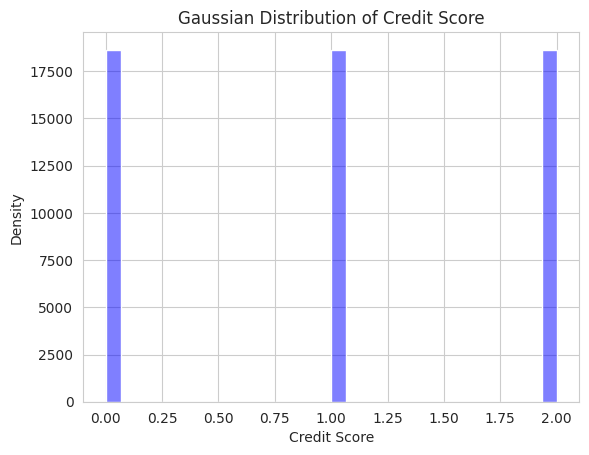

In [ ]:
sns.histplot(Y_train_sm, bins=30, alpha=0.5, color='blue')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Gaussian Distribution of Credit Score')
plt.show()

# Re-training on the entire data

In [ ]:
smt = SMOTE(random_state = 2)
X_train_sm,Y_train_sm = smt.fit_resample(X_train_all,Y_train_all)

In [ ]:
model = XGBClassifier(learning_rate =0.15,
 n_estimators=100,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 num_class=3,
 nthread=4,
 seed=27)
model.fit(X_train_sm, Y_train_sm)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train_sm)

In [ ]:
print('Test Score: ',round(accuracy_score(Y_test, y_pred)*100,3))
print('Train Score: ',round(accuracy_score(Y_train_sm, y_train_predict)*100,3))
print('Precision: ',round(precision_score(Y_test, y_pred,pos_label='positive',average='macro')*100,3))
print('Recall: ',round(recall_score(Y_test, y_pred,pos_label='positive',average='macro')*100,3))
print('F1: ',round(f1_score(Y_test, y_pred, average='macro')*100,3))

Test Score:  78.135
Train Score:  100.0
Precision 76.824
Recall 77.193
F1 77.002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
model.save_model('model.h5')